# <b>Introduction: Goal and Motivation</b>


## <b>Goal of the Project</b>
The primary goal of this project is to analyze the World Happiness Report data from 2015 to 2019 to discern evolving global happiness trends. Through comprehensive examination of this dataset, the project aims to identify key factors influencing happiness levels among different countries and regions. By comparing and contrasting happiness scores over time and across nations, the objective is to uncover insights that illuminate the variations in happiness and the underlying factors driving these differences.

## <b>Motivation for Exploring World Happiness Report Data</b>
The motivation behind exploring the World Happiness Report data lies in its comprehensive survey methodology that evaluates happiness based on multiple factors such as economic stability, social support, health, freedom, and perceptions of corruption. These metrics not only provide a snapshot of well-being but also offer insights into societal and economic conditions that influence happiness levels globally.

Through this exploration, I aim to:

1. Analyze and interpret patterns and trends in global happiness scores from 2015 to 2019.
2. Assess the varying importance of economic stability, social support, health, freedom, and perceptions of corruption in contributing to happiness.
3. Examine the impact of geopolitical shifts and socio-economic changes on happiness levels across different regions and countries.

# <b>About Dataset</b>

#  Key Features:
The dataset used for this project includes the following variables:

- Country: The country name.
- Region: The geographical region to which the country belongs (if available).
- Year: The year of the data observation.
- Happiness_Rank: The rank of the country based on its Happiness Score.
- Happiness_Score: A metric indicating the perceived happiness of a country's citizens.
- Economy_GDP_per_Capita: The GDP per capita of the country, a proxy for economic well-being.
- Family: The strength of social support available to citizens of the country.
- Health_Life_Expectancy: Life expectancy and overall health measures in the country.
- Freedom: The degree of personal freedom enjoyed by citizens.
- Trust_Government_Corruption: Perceptions of government transparency and trustworthiness.
- Generosity: The extent to which individuals in the country are generous.


In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('../data/all_happiness_data.csv')
data.head()

,Country,Region,Year,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000


In [14]:
data.columns

Index(['Country', 'Region', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity'],
      dtype='object')

# <b>Visualization 1: How Have Global Happiness Scores Changed Over Time (2015-2019)?</b>

In [15]:
average_happiness_per_year = data.groupby('Year')['Happiness_Score'].mean().reset_index() # Calculating the average happiness score for each year


max_year = average_happiness_per_year.loc[average_happiness_per_year['Happiness_Score'].idxmax()]# years with the highest and lowest average happiness score
min_year = average_happiness_per_year.loc[average_happiness_per_year['Happiness_Score'].idxmin()]

fig = px.line(average_happiness_per_year, x='Year', y='Happiness_Score', 
              title='How Have Global Happiness Scores Changed Over Time (2015-2019)?',
              labels={'Happiness_Score': 'Average Happiness Score', 'Year': 'Year'},
              markers=True)# Creation of the line plot 


fig.add_annotation(
    x=max_year['Year'], 
    y=max_year['Happiness_Score'],
    text=f"Highest: {max_year['Happiness_Score']:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(family="Courier New, monospace", size=16, color="#ffffff"),
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="blue",
    opacity=0.8
            
)# Adding annotation for the highest points


fig.add_annotation(
    x=min_year['Year'], 
    y=min_year['Happiness_Score'],
    text=f"Lowest: {min_year['Happiness_Score']:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    font=dict(family="Courier New, monospace", size=16, color="#ffffff"),
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="red",
    opacity=0.8
)# Adding annotation for the lowest points


fig.show()


* From the plot above, we can observe that happiness scores fluctuated between 2015 and 2019. Until 2016, the average happiness score increased, but then it started to decrease sharply, reaching its lowest point of 5.35 in 2017. After 2017, the score increased, reaching its highest value of 5.41 in 2019. Overall, the happiness score increased over the five years, peaking in 2019. However, with the onset of the COVID-19 pandemic, it is likely that the happiness score has significantly decreased since then.

# <b>Visualization 2: How Do Average Happiness Scores Differ Across Countries Over the Years (2015-2019)?</b>


In [16]:
average_happiness_per_country_year = data.groupby(['Country', 'Region', 'Year'])['Happiness_Score'].mean().reset_index()# Calculating the average happiness score for each country and year

# Custom color scale
colorscale_custom = [
    [0.0, '#FF0000'],  # Red
    [0.5, '#FFFFFF'],  # White (neutral midpoint)
    [1.0, '#0000FF']   # Blue
]

fig_map = px.choropleth(average_happiness_per_country_year, locations='Country', locationmode='country names',
                        color='Happiness_Score', hover_name='Country', hover_data=['Region', 'Year', 'Happiness_Score'],
                        animation_frame='Year',
                        title='How Do Average Happiness Scores Differ Across Countries (2015-2019)?',
                        labels={'Happiness_Score': 'Average Happiness Score'},
                        color_continuous_scale=colorscale_custom)# interactive choropleth map  with custom color scale

fig_map.update_layout(height=650, width=1300)#  adjusting width and height

fig_map.show()


* From the plot above, we observe that countries in North America, Latin America and the Caribbean, Australia and New Zealand, and Western Europe consistently show higher values over the years compared to countries in other regions. The sole exception within the Latin America and Caribbean region, where a decrease in value occurred over the five-year period, is Venezuela; notably, its color on the plot changed from blue to red during this time.

* In Sub-Saharan Africa, the happiness scores of many countries sharply decreased over the five-year period. This trend is noticeable in countries such as the Central African Republic, Tanzania, Zimbabwe, Botswana, and Malawi, where their colors turned dark red on the plot. Similarly, Syria and Afghanistan started with very low happiness scores in 2015, which remained consistently low over the subsequent five years, indicated by their persistent dark red color. Yemen, initially depicted in blue in 2015, experienced a significant decline in happiness score over the same period, as evidenced by its change to dark red

* Countries in Central and Eastern Europe maintained an average happiness score over the five years, as indicated by their consistently light blue or white colors on the plot throughout the period."

# <b>Visualization 3: Which Countries Show the Highest and Lowest Average Happiness Scores Over the Years?</b>

In [17]:
average_happiness_per_country_year = data.groupby(['Country', 'Year'])['Happiness_Score'].mean().reset_index()# Calculating the average happiness score for each country and year

average_happiness_per_country_year = average_happiness_per_country_year.sort_values(by=['Year', 'Happiness_Score'], ascending=[True, False])# Sorting countries 

top_bottom_countries = pd.concat([
    average_happiness_per_country_year.groupby('Year').head(5),
    average_happiness_per_country_year.groupby('Year').tail(5)
])# Filtering top 5 and bottom 5 countries for each year

fig = px.bar(top_bottom_countries, x='Happiness_Score', y='Country', animation_frame='Year',
             title='Top and Bottom 5 Countries by Average Happiness Score (2015-2019)',
             labels={'Happiness_Score': 'Average Happiness Score', 'Country': 'Country'},
             color='Happiness_Score',
             color_continuous_scale='RdBu',  
             orientation='h')# Creating a dynamic bar chart 

fig.update_layout(width=1200, height=600, yaxis=dict(autorange="reversed"))  # adjusting width and height

fig.show()



* Throughout the period from 2015 to 2019, several European countries, particularly those in the Nordics (Switzerland, Iceland, Denmark, and Norway), consistently ranked among the top 5 countries by average Happiness Score.Finland joined them from 2016 to 2018, while the Netherlands replaced Finland in 2019. This stability at the top reflects these countries' enduring high levels of happiness and well-being, underscoring regional dominance in global happiness rankings.

* Several nations routinely scored among the lowest by average Happiness Score between 2015 and 2019, including Rwanda, Benin, Syria, Burundi, Togo, Afghanistan, Tanzania, Central African Republic, and South Sudan.This persistence highlights ongoing challenges in these nations over the observed period. Despite variations in specific rankings year to year, these countries face enduring socio-economic and political difficulties that impact their overall happiness scores compared to global averages.


# <b>Visualization 4: What are the Factors Affecting Happiness Scores Across Regions?</b>


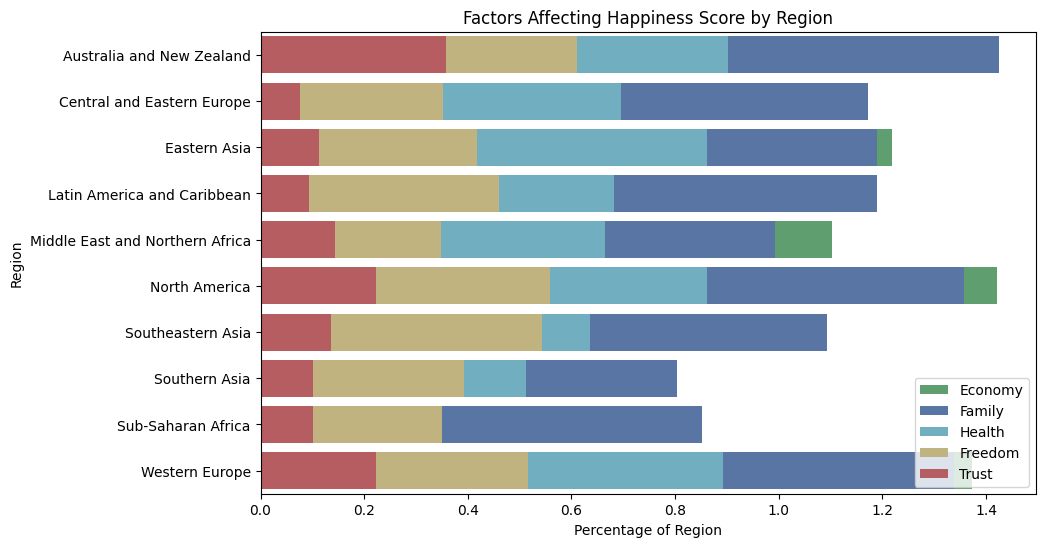

In [18]:
numeric_columns = ['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')# Converting necessary columns to numeric 


average_factors_by_region = data.groupby('Region')[numeric_columns].mean().reset_index()# Calculating average factors by region


plt.figure(figsize=(10, 6))

sns.set_color_codes("deep")

# Plotting each factor as a horizontal bar
sns.barplot(x='Economy_GDP_per_Capita', y='Region', data=average_factors_by_region, color='g', label='Economy')
sns.barplot(x='Family', y='Region', data=average_factors_by_region, color='b', label='Family')
sns.barplot(x='Health_Life_Expectancy', y='Region', data=average_factors_by_region, color='c', label='Health')
sns.barplot(x='Freedom', y='Region', data=average_factors_by_region, color='y', label='Freedom')
sns.barplot(x='Trust_Government_Corruption', y='Region', data=average_factors_by_region, color='r', label='Trust')

plt.xlabel('Percentage of Region')
plt.ylabel('Region')
plt.title('Factors Affecting Happiness Score by Region')# Customizing labels and title

plt.legend(loc='lower right', frameon=True)

plt.show()


* The graph presents a comparative analysis of various factors contributing to happiness across different global regions. The factors include Economy, Family, Health, Freedom, and Trust. Each region is represented by a horizontal stacked bar chart, indicating the proportional contribution of each factor to the overall happiness score.

   Key observations from the graph include:

   1. **Economy**:
      - Contributes significantly to happiness scores in North America and Western Europe.
      - Has a moderate impact in the Middle East and Northern Africa, and Eastern Asia.

   2. **Family**:
      - Plays a substantial role in happiness across most regions, especially in Latin America and the Caribbean, and Eastern Asia.
      - Lesser emphasis in Southeastern Asia and Sub-Saharan Africa.

   3. **Health**:
      - A major contributor in all regions, with North America, Western Europe, and Eastern Asia showing notable emphasis.
      - Relatively lower impact in Southern Asia and Sub-Saharan Africa.

   4. **Freedom**:
      - Significant in regions such as Australia and New Zealand, and Latin America and the Caribbean.
      - Lower impact in Eastern Asia and Central and Eastern Europe.

   5. **Trust**:
      - Generally, the least contributing factor across all regions.
      - Notably higher in Western Europe and Central and Eastern Europe compared to other regions.

# <b>Visualization 5: How do average happiness scores vary across regions over the years?</b>

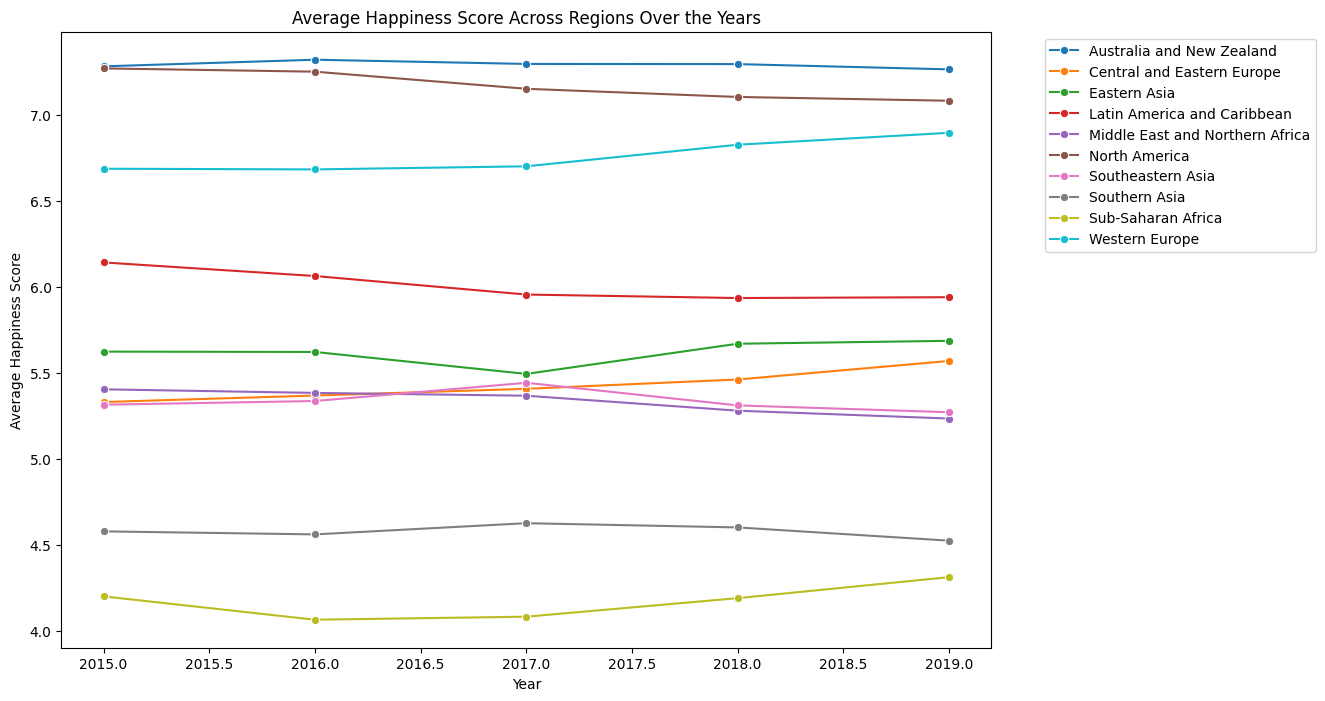

In [19]:
average_happiness_by_region_year = data.groupby(['Region', 'Year'])['Happiness_Score'].mean().reset_index()# Calculating average happiness score by Region 

plt.figure(figsize=(12, 8))

sns.lineplot(x='Year', y='Happiness_Score', hue='Region', data=average_happiness_by_region_year, marker='o')# Plotting each region's happiness score over the years

plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score Across Regions Over the Years')# Customizing labels and title

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')# Adjusting legend position

plt.show()


* In the initial visualization, we examined how happiness scores change over the years, whereas this plot provides a deeper understanding of the happiness scores across world regions.

The graph is a line chart showing the average happiness scores across different regions over the years from 2015 to 2019. The x-axis represents the years, while the y-axis represents the average happiness scores. Each line represents a different region, with a legend indicating which color corresponds to which region.

* Western Europe and Australia and New Zealand are the happiest regions, maintaining high scores throughout the years.
* Eastern Asia shows a noticeable improvement in happiness scores.
* Latin America and Caribbean, North America, and Middle East and Northern Africa exhibit slight downward trends.
* Sub-Saharan Africa consistently has the lowest happiness scores.

Overall, there are minor fluctuations and slight upward or downward trends in different regions, but no drastic changes over the five-year period.








# <b>Visualization 6: How do different factors correlate with happiness scores globally?</b>

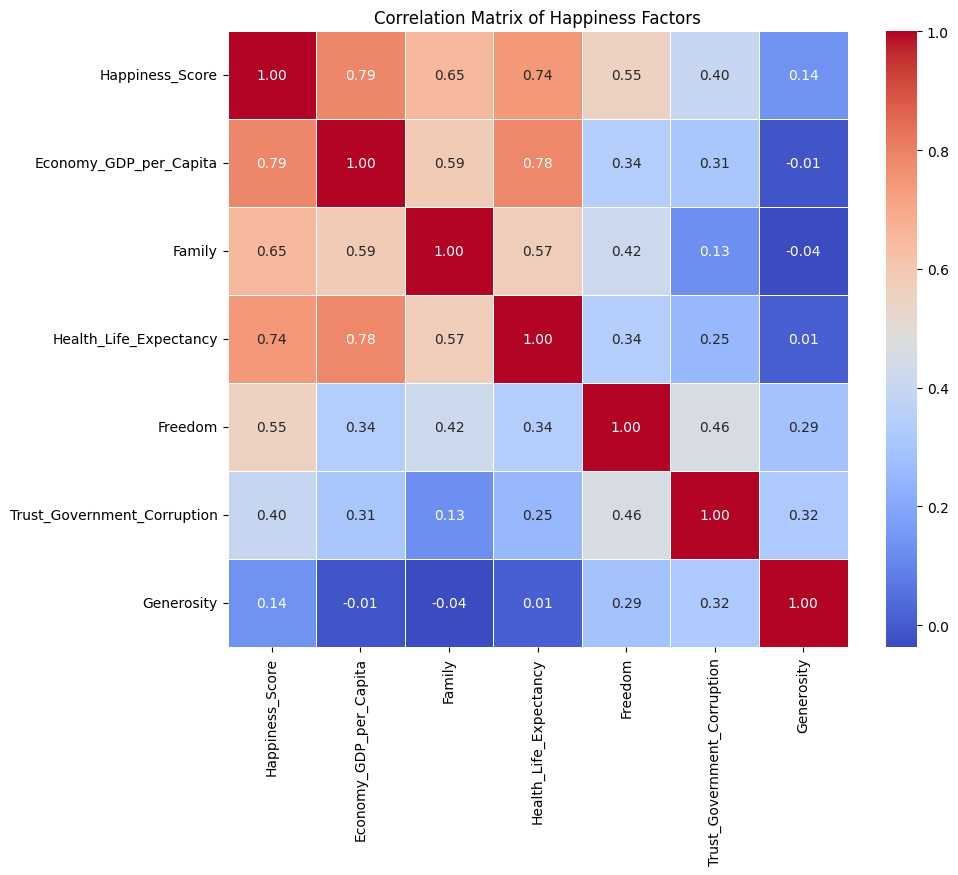

In [20]:
numerical_columns = ['Happiness_Score', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity']

numerical_data = data[numerical_columns]# Subset the data to include only numerical columns

correlation_matrix = numerical_data.corr()# Calculating the correlation matrix

plt.figure(figsize=(10, 8))# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Happiness Factors')
plt.show()


So far, we have explored various aspects of global happiness through visualizations such as tracking changes over time, comparing country averages, identifying extremes, and examining regional variations. These analyses have provided insights into the dynamics of happiness across different contexts and periods. Now, we delve into the correlation matrix of happiness factors because it illuminates the underlying relationships between key metrics. The graph is a heatmap displaying the correlation matrix of various happiness factors. 

# Happiness Score:

* Strongly correlated with Economy (GDP per Capita) (0.79), Health (Life Expectancy) (0.74), and Family (0.65).
* Moderately correlated with Freedom (0.55).
* Weakly correlated with Trust (Government Corruption) (0.40) and Generosity (0.14).

# Economy (GDP per Capita):

* Strongly correlated with Health (Life Expectancy) (0.78) and Happiness Score (0.79).
* Moderately correlated with Family (0.59).
* Weakly correlated with Freedom (0.34) and Trust (Government Corruption) (0.31).
* Negatively correlated with Generosity (-0.01).

# Family:

* Moderately correlated with Happiness Score (0.65), Economy (GDP per Capita) (0.59), and Health (Life Expectancy) (0.57).
* Weakly correlated with Freedom (0.42) and Trust (Government Corruption) (0.13).
* Negatively correlated with Generosity (-0.04).

# Health (Life Expectancy):

* Strongly correlated with Economy (GDP per Capita) (0.78) and Happiness Score (0.74).
* Moderately correlated with Family (0.57).
* Weakly correlated with Freedom (0.34) and Trust (Government Corruption) (0.25).
* Very weakly correlated with Generosity (0.01).

# Freedom:

* Moderately correlated with Happiness Score (0.55) and Family (0.42).
* Weakly correlated with Trust (Government Corruption) (0.46) and Generosity (0.29).
* Weakest correlation with Economy (GDP per Capita) (0.34) and Health (Life Expectancy) (0.34).

# Trust (Government Corruption):

* Weakly correlated with all factors, with the highest correlation with Freedom (0.46).
* Correlation with Happiness Score (0.40) and Health (Life Expectancy) (0.25).
* Very weakly correlated with Family (0.13) and Economy (GDP per Capita) (0.31).
* Weakly correlated with Generosity (0.32).

# Generosity:

* Weakest correlation with Happiness Score (0.14), Economy (GDP per Capita) (-0.01), Family (-0.04), and Health (Life Expectancy) (0.01).
* Moderately correlated with Freedom (0.29) and Trust (Government Corruption) (0.32).

Overall, the heatmap indicates that the Happiness Score is most strongly influenced by the Economy (GDP per Capita), Health (Life Expectancy), and Family, while Trust (Government Corruption) and Generosity have the weakest correlations.

# <b>Visualization 7: Comparing Happiness Scores Over Time: Azerbaijan vs. Germany</b>

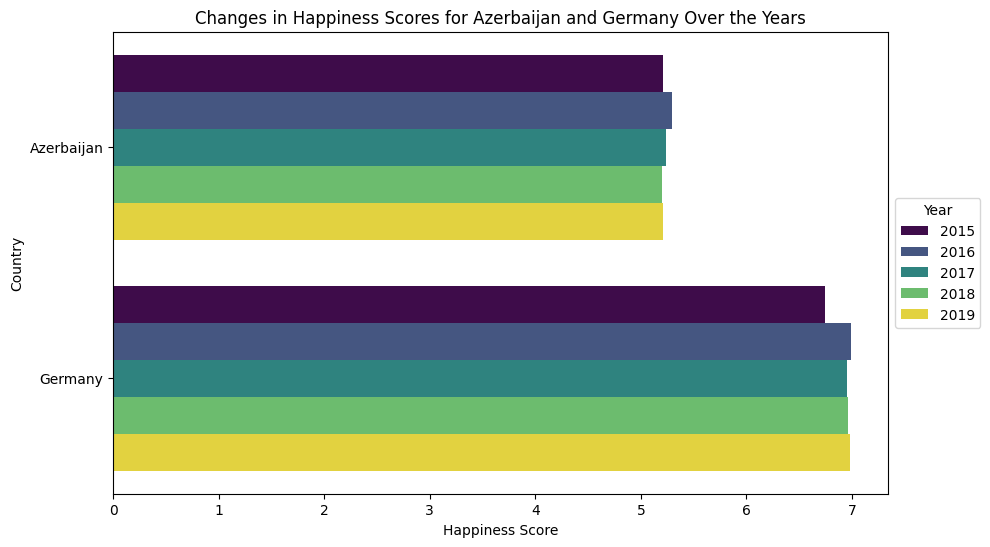

In [21]:
countries = ['Azerbaijan', 'Germany']
data_subset = data[data['Country'].isin(countries)]# Subset data for Azerbaijan and Germany

plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness_Score', y='Country', hue='Year', data=data_subset, palette='viridis')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Changes in Happiness Scores for Azerbaijan and Germany Over the Years')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


* I find it particularly intriguing to observe the variations in happiness scores between Azerbaijan, my home country, and Germany, my current country of residence. The differences between them are quite fascinating to me.

The graph illustrates the happiness scores of Azerbaijan and Germany from 2015 to 2019. Each year is represented by a different color, and the scores are plotted on a horizontal bar chart for each country.

Key observations include:

# Azerbaijan:

* In 2015, the happiness score was around 5.1.
* The score slightly increased in 2016 to approximately 5.2.
* There was a consistent upward trend from 2017 to 2019, with scores around 5.3, 5.4, and 5.5 respectively.
* Overall, Azerbaijan's happiness score showed a gradual increase over the five years.

# Germany:

* In 2015, the happiness score was about 6.9.
* The score remained relatively stable in 2016, slightly below 7.
* From 2017 to 2019, the score continued to hover around the 7 mark, with minor fluctuations.
* Germany's happiness score remained consistently high and stable over the five-year period.

Overall, the graph highlights that while Azerbaijan experienced a steady increase in happiness scores from 2015 to 2019, Germany maintained a consistently high level of happiness throughout the same period.

# <b>Conclusion</b>

In summary, the analysis of the World Happiness Report data spanning 2015-2019 has provided valuable insights into global happiness trends. Through detailed examination of happiness scores, it is evident that economic stability, social support, health, freedom, and perceptions of corruption play pivotal roles in shaping happiness levels across nations. Over the years studied, we observed both stable trends and notable fluctuations in happiness scores, influenced by geopolitical changes and socio-economic factors. This study underscores the complex interplay of these variables and highlights the importance of addressing diverse factors to enhance global well-being. Moving forward, understanding these dynamics will be crucial for informing policies and i